In [2]:
import pandas as pd
 
train = pd.read_csv('atrain.csv')
test = pd.read_csv('atest.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Explore data set


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_ID = train['Id']
test_ID = test['Id']

In [7]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [8]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


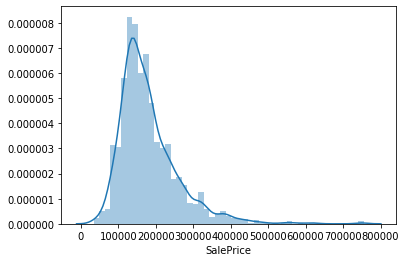

In [9]:
sns.distplot(train['SalePrice']);


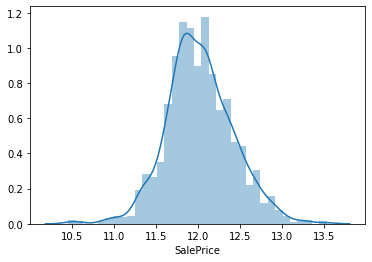

In [10]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice']);


In [11]:
ntrain = train.shape[0] # number of training
ntest = test.shape[0] #number of test
y_train = train.SalePrice.values #value of saleprice


In [12]:
#concat train/test data
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape


(2919, 79)

In [23]:
#check null values 
all_na = (all_data.isnull().sum() / len(all_data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)


,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

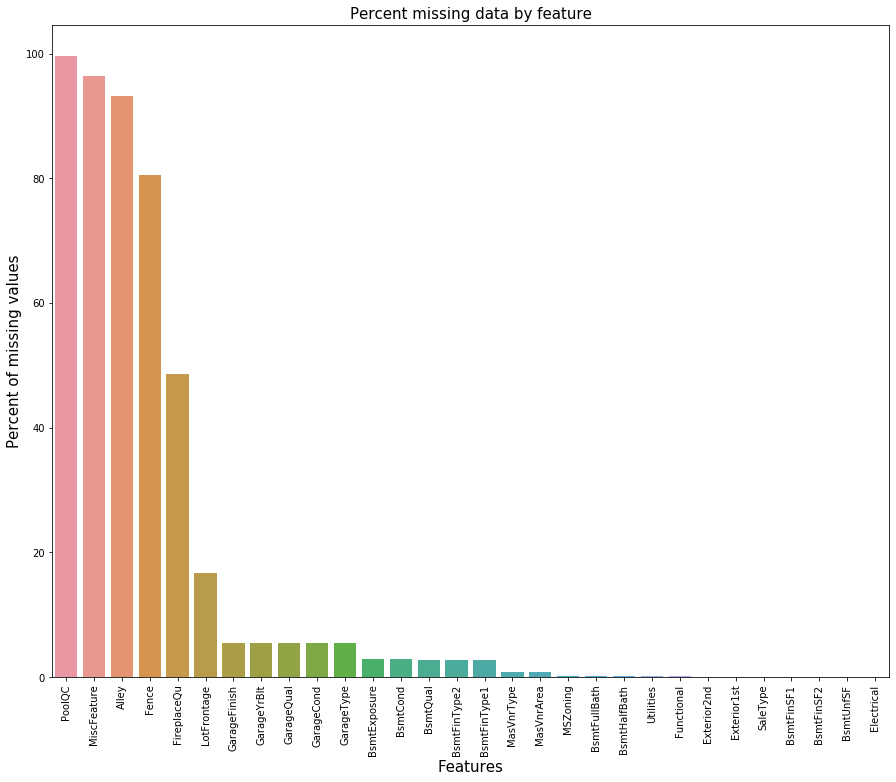

In [24]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


# Features Tuning

PoolQC

In [25]:
#according to dic, Nan value of the pool means no oool in the house 
all_data["PoolQC"].value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [26]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [27]:
all_data["PoolQC"].value_counts()


None    2909
Gd         4
Ex         4
Fa         2
Name: PoolQC, dtype: int64

MiscFeature

In [28]:
#according to dic, Nan value of the Miscfeature means no Miscellaneous feature in the house 
all_data["MiscFeature"].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [29]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [31]:
all_data["MiscFeature"].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

Alley

In [32]:
#according to dic, Nan value of the Alley means no Alley access in the house 
all_data["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [33]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [34]:
all_data["Alley"].value_counts()

None    2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

Fence

In [35]:
#according to dic, Nan value of the Fence means no Fence in the house 
all_data["Fence"].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [36]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [37]:
all_data["Fence"].value_counts()

None     2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

FireplaceQu

In [38]:
#according to dic, Nan value of the FireplaceQuality means no Fireplace in the house 
all_data["FireplaceQu"].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [39]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["FireplaceQu"].value_counts()

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

LotFrontage

In [40]:
#LotFrontage: Linear feet of street connected to property
#fill with medium of neighborhood's LotFrontage
all_data["LotFrontage"].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [41]:
all_data["LotFrontage"].fillna(all_data.groupby("Neighborhood")["LotFrontage"].transform("median"), inplace=True)

In [42]:
all_data[["Neighborhood","LotFrontage"]].head(30)

,Neighborhood,LotFrontage
0,CollgCr,65.0
1,Veenker,80.0
2,CollgCr,68.0
3,Crawfor,60.0
4,NoRidge,84.0
5,Mitchel,85.0
6,Somerst,75.0
7,NWAmes,80.0
8,OldTown,51.0
9,BrkSide,50.0


In [43]:
#GarageYrBlt: Year garage was built
all_data[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head() 

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
0,2003.0,Attchd,2.0,548.0,TA,TA,RFn
1,1976.0,Attchd,2.0,460.0,TA,TA,RFn
2,2001.0,Attchd,2.0,608.0,TA,TA,RFn
3,1998.0,Detchd,3.0,642.0,TA,TA,Unf
4,2000.0,Attchd,3.0,836.0,TA,TA,RFn


In [46]:
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna("None")
all_data['GarageType'] = all_data['GarageType'].fillna("None")
all_data['GarageQual'] = all_data['GarageQual'].fillna("None")
all_data['GarageCond'] = all_data['GarageCond'].fillna("None")
all_data['GarageFinish'] = all_data['GarageFinish'].fillna("None")
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [45]:
all_data[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head() 

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
0,2003,Attchd,2.0,548.0,TA,TA,RFn
1,1976,Attchd,2.0,460.0,TA,TA,RFn
2,2001,Attchd,2.0,608.0,TA,TA,RFn
3,1998,Detchd,3.0,642.0,TA,TA,Unf
4,2000,Attchd,3.0,836.0,TA,TA,RFn


BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual, BsmtFullBath, BsmtHalfBath,TotalBsmtSF, BsmtFinSF1,BsmtFinSF2,BsmtUnfSF

In [47]:
#check null values..
all_data[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']].head(20) 

#if one col is null, all of these columns are null

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,Unf,No,GLQ,TA,Gd,1.0,0.0,856.0,706.0,0.0,150.0
1,Unf,Gd,ALQ,TA,Gd,0.0,1.0,1262.0,978.0,0.0,284.0
2,Unf,Mn,GLQ,TA,Gd,1.0,0.0,920.0,486.0,0.0,434.0
3,Unf,No,ALQ,Gd,TA,1.0,0.0,756.0,216.0,0.0,540.0
4,Unf,Av,GLQ,TA,Gd,1.0,0.0,1145.0,655.0,0.0,490.0
5,Unf,No,GLQ,TA,Gd,1.0,0.0,796.0,732.0,0.0,64.0
6,Unf,Av,GLQ,TA,Ex,1.0,0.0,1686.0,1369.0,0.0,317.0
7,BLQ,Mn,ALQ,TA,Gd,1.0,0.0,1107.0,859.0,32.0,216.0
8,Unf,No,Unf,TA,TA,0.0,0.0,952.0,0.0,0.0,952.0
9,Unf,No,GLQ,TA,TA,1.0,0.0,991.0,851.0,0.0,140.0


In [48]:
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna("None")
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna("None")
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna("None")
all_data['BsmtCond'] = all_data['BsmtCond'].fillna("None")
all_data['BsmtQual'] = all_data['BsmtQual'].fillna("None")
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

In [49]:
all_data[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF']].head(20) 

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
0,Unf,No,GLQ,TA,Gd,1.0,0.0,856.0
1,Unf,Gd,ALQ,TA,Gd,0.0,1.0,1262.0
2,Unf,Mn,GLQ,TA,Gd,1.0,0.0,920.0
3,Unf,No,ALQ,Gd,TA,1.0,0.0,756.0
4,Unf,Av,GLQ,TA,Gd,1.0,0.0,1145.0
5,Unf,No,GLQ,TA,Gd,1.0,0.0,796.0
6,Unf,Av,GLQ,TA,Ex,1.0,0.0,1686.0
7,BLQ,Mn,ALQ,TA,Gd,1.0,0.0,1107.0
8,Unf,No,Unf,TA,TA,0.0,0.0,952.0
9,Unf,No,GLQ,TA,TA,1.0,0.0,991.0


MasVnrArea, MasVnrType

In [50]:
# 0 MasVnrArea means no Masonry veneer
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['MasVnrType'] = all_data['MasVnrType'].fillna("None")

In [53]:
all_data['MasVnrArea'].value_counts() 

0.0      1761
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64

In [52]:
all_data['MasVnrType'].value_counts() 

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

Electrical

In [54]:
#only one null value of electrical so..
all_data['Electrical'].value_counts() #SBrkr is most frequent value so we fill null as SBrkr

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [55]:
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr")

MSZoning

In [56]:
all_data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [57]:
#fill Nan with RL which is most frequent value
all_data['MSZoning'] = all_data['MSZoning'].fillna("RL")

In [58]:
all_data['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

Utilities

In [59]:
all_data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [60]:
#fill Nan with Allpub which is most frequent value 
all_data['Utilities'] = all_data['Utilities'].fillna("AllPub")

In [61]:
all_data['Utilities'].value_counts()


AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

Functional

In [62]:
all_data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [63]:
#fill Nan with Typ which is most frequent value
all_data['Functional'] = all_data['Functional'].fillna("Typ")

In [64]:
all_data['Functional'].value_counts()

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

SaleType

In [65]:
all_data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [66]:
all_data['SaleType'] = all_data['SaleType'].fillna("WD")

KitchenQual

In [67]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [68]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA")

Exterior1st and Exterior2nd

In [69]:
all_data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [70]:
all_data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [71]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna("VinylSd")
#all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])  같은 코드 

In [72]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna("VinylSd")

Check every features

In [73]:
#check null values 
all_na = (all_data.isnull().sum() / len(all_data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)

,Missing Ratio


# More Feature Tuning

In [74]:
all_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
7,60,RL,80.0,10382,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,None,None,0,1,2008,WD,Normal


In [75]:
all_data.describe() #we will deal with scale soon 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.542994,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,...,472.712573,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,21.703256,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,...,215.535686,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,70.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Add/Drop more features

In [76]:
all_data["Utilities"].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [77]:
all_data.drop('Utilities', axis=1, inplace=True)

In [78]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,0,None,None,None,0,12,2008,WD,Normal


Check Correlation

In [79]:
corr = train.corr(method='pearson').drop(['SalePrice']).sort_values('SalePrice', ascending=False)['SalePrice']
corr 

OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

In [80]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,0,None,None,None,0,12,2008,WD,Normal


In [81]:
all_data.drop('PoolArea', axis=1, inplace=True)
all_data.drop('MoSold', axis=1, inplace=True)
all_data.drop('3SsnPorch', axis=1, inplace=True)
all_data.drop('BsmtFinSF2', axis=1, inplace=True)
all_data.drop('BsmtHalfBath', axis=1, inplace=True)
all_data.drop('MiscVal', axis=1, inplace=True)
all_data.drop('LowQualFinSF', axis=1, inplace=True)
all_data.drop('YrSold', axis=1, inplace=True)
all_data.drop('OverallCond', axis=1, inplace=True)
all_data.drop('MSSubClass', axis=1, inplace=True)

In [82]:
all_data.shape #delete 10 cols

(2919, 68)

In [83]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew 

In [84]:
#get the numeric values
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index
numeric_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch'],
      dtype='object')

In [85]:
# Check the skew of all numerical features
skewed_feats = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
LotArea,12.822431
KitchenAbvGr,4.302254
EnclosedPorch,4.003891
ScreenPorch,3.946694
MasVnrArea,2.613592
OpenPorchSF,2.535114
WoodDeckSF,1.842433
LotFrontage,1.505704
1stFlrSF,1.469604
BsmtFinSF1,1.425230


In [86]:
skewness = skewness[abs(skewness)>0.5]
all_data[skewness.index] = np.log1p(all_data[skewness.index])

In [87]:
# Check the skew of all numerical features

skewed_feats = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
KitchenAbvGr,3.520351
ScreenPorch,2.945905
EnclosedPorch,1.961081
HalfBath,0.580692
MasVnrArea,0.537018
BsmtFullBath,0.425167
2ndFlrSF,0.305049
Fireplaces,0.237587
WoodDeckSF,0.158033
1stFlrSF,0.064828


In [88]:
#from sklearn.preprocessing import minmax_scale

#df['col_name']= minmax_scale(df['col_name'], axis=0, copy=True)

Categorial to num, num to categorial

In [89]:
all_data.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,4.189655,9.042040,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,...,Y,0.000000,4.127134,0.000000,0.0,None,None,None,WD,Normal
1,RL,4.394449,9.169623,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,...,Y,5.700444,0.000000,0.000000,0.0,None,None,None,WD,Normal
2,RL,4.234107,9.328212,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,...,Y,0.000000,3.761200,0.000000,0.0,None,None,None,WD,Normal
3,RL,4.110874,9.164401,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,...,Y,0.000000,3.583519,5.609472,0.0,None,None,None,WD,Abnorml
4,RL,4.442651,9.565284,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,...,Y,5.262690,4.442651,0.000000,0.0,None,None,None,WD,Normal


In [90]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
all_data.shape

(2919, 68)

In [91]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 313)


In [92]:
all_data.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,1,1,3,0,2.079442,7.602900,7.602900,5.283204,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,1,1,3,0,1.945910,7.589336,7.589336,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,1,1,0,0,2.079442,7.601902,7.602401,5.093750,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,1,1,0,0,2.079442,7.557995,7.586296,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,1,1,0,0,2.197225,7.601402,7.601402,5.860786,...,0,0,0,1,0,0,0,0,1,0


In [93]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [102]:
import xgboost as xgb
import lightgbm as lgb

In [109]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


XGBoost

In [103]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)


LightGBM

In [105]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


# Model scores

XGBoost scores

In [110]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1256 (0.0169)



LightGBM scores

In [111]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1283 (0.0168)



# Prediction

In [112]:
#define a rmsle evaluation function

def rmsle(y, y_pred): 
    return np.sqrt(mean_squared_error(y, y_pred))

XGBoost

In [113]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.08231906306028894


LightGBM

In [114]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.08096501335817692
